In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# import data 
data = pd.read_csv("Train.csv")
data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [32]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_25446/3916194540.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)


In [33]:
import numpy as np

data = data.replace([np.inf, -np.inf], np.nan)
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_25446/2794399694.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_25446/2794399694.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [34]:
from scipy.signal import periodogram

# Define the improved periodogram plotting function
def plot_periodogram(ts, detrend='linear', ax=None):
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")  # Sampling frequency set to daily data for annual seasonality
    frequencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    
    # Plot the periodogram
    if ax is None:
        _, ax = plt.subplots(figsize=(12, 6))
    ax.step(frequencies, spectrum, color="purple", where="mid")
    
    # Set up log scale for x-axis
    ax.set_xscale("log")
    
    
    # Formatting and labels
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    ax.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    return ax


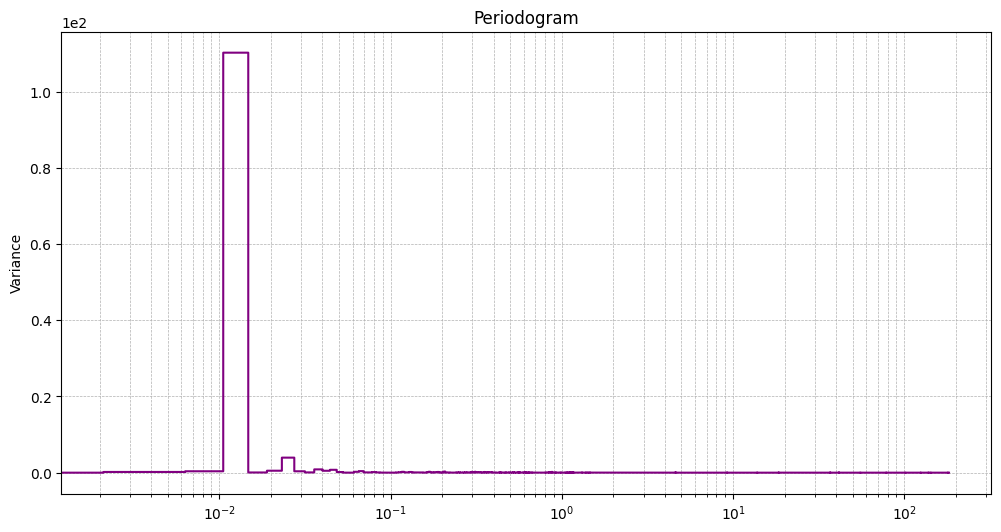

In [35]:

# Call the function to plot
ax = plot_periodogram(data['LST'])
plt.show()

In [36]:
# less frequent - annaul seasonaility 
# less number of fourier transformations

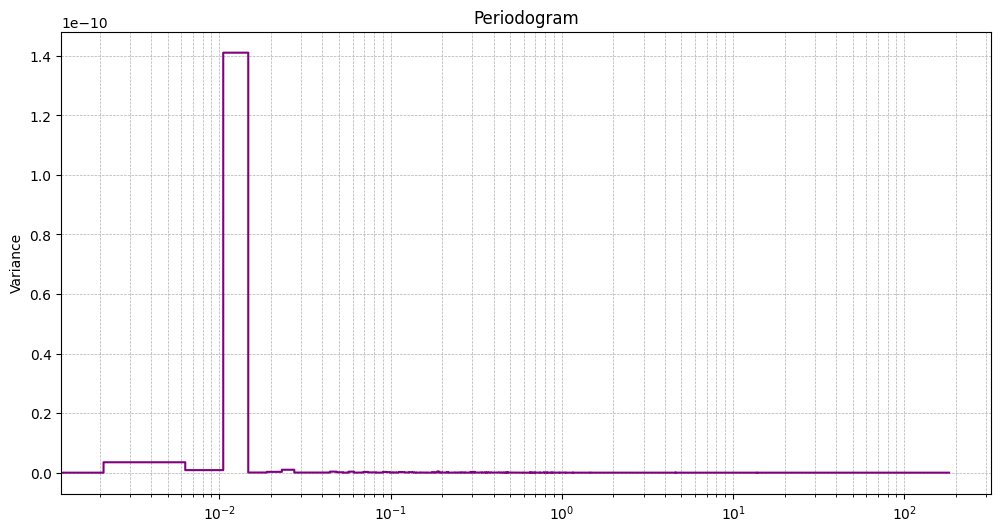

In [37]:
ax = plot_periodogram(data['NO2_strat'])
plt.show()

In [38]:
# less frequent - annaul seasonaility -- but greater than 
# less number of fourier transformations -- maybe 6?

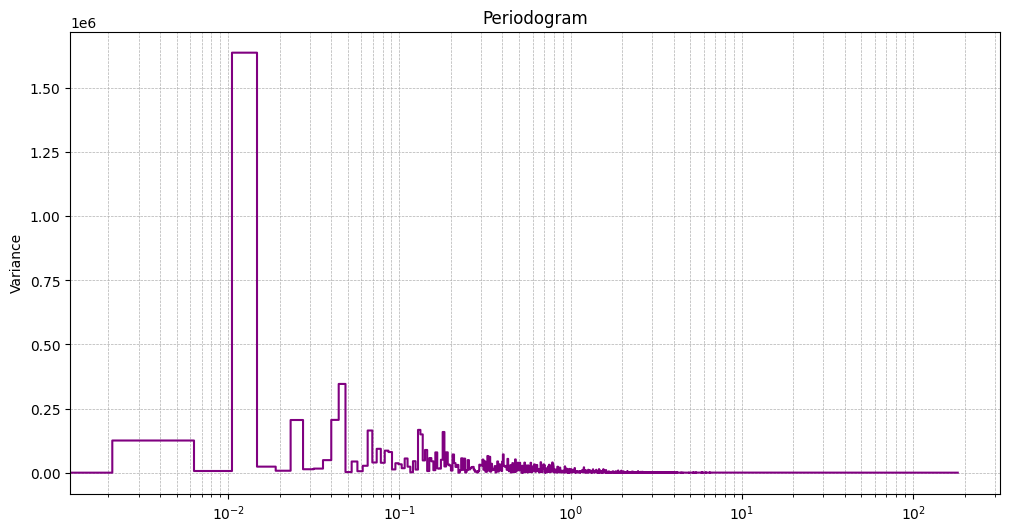

In [39]:
ax = plot_periodogram(data['TropopausePressure'])
plt.show()

In [40]:
# require more number of transformation

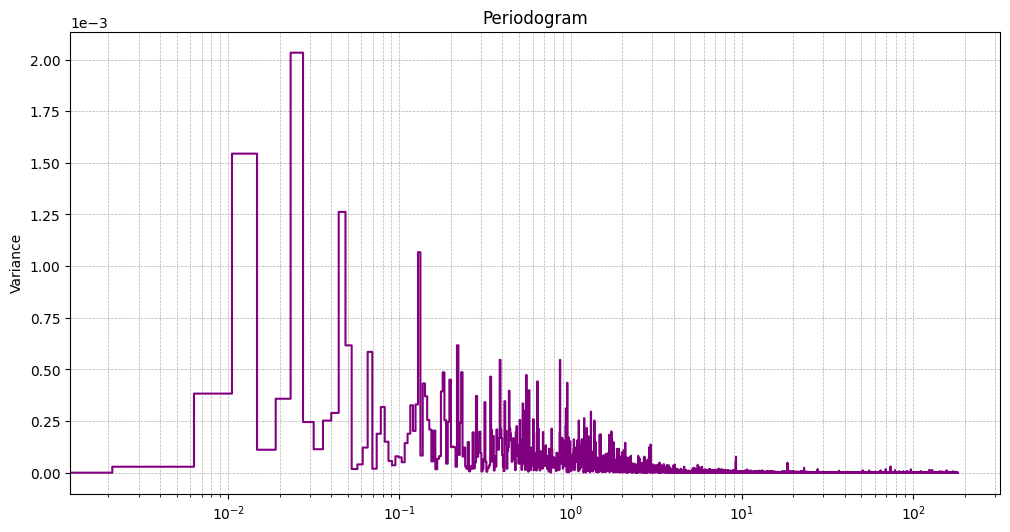

In [41]:
ax = plot_periodogram(data['CloudFraction'])
plt.show()

In [42]:
# require more number of transformation

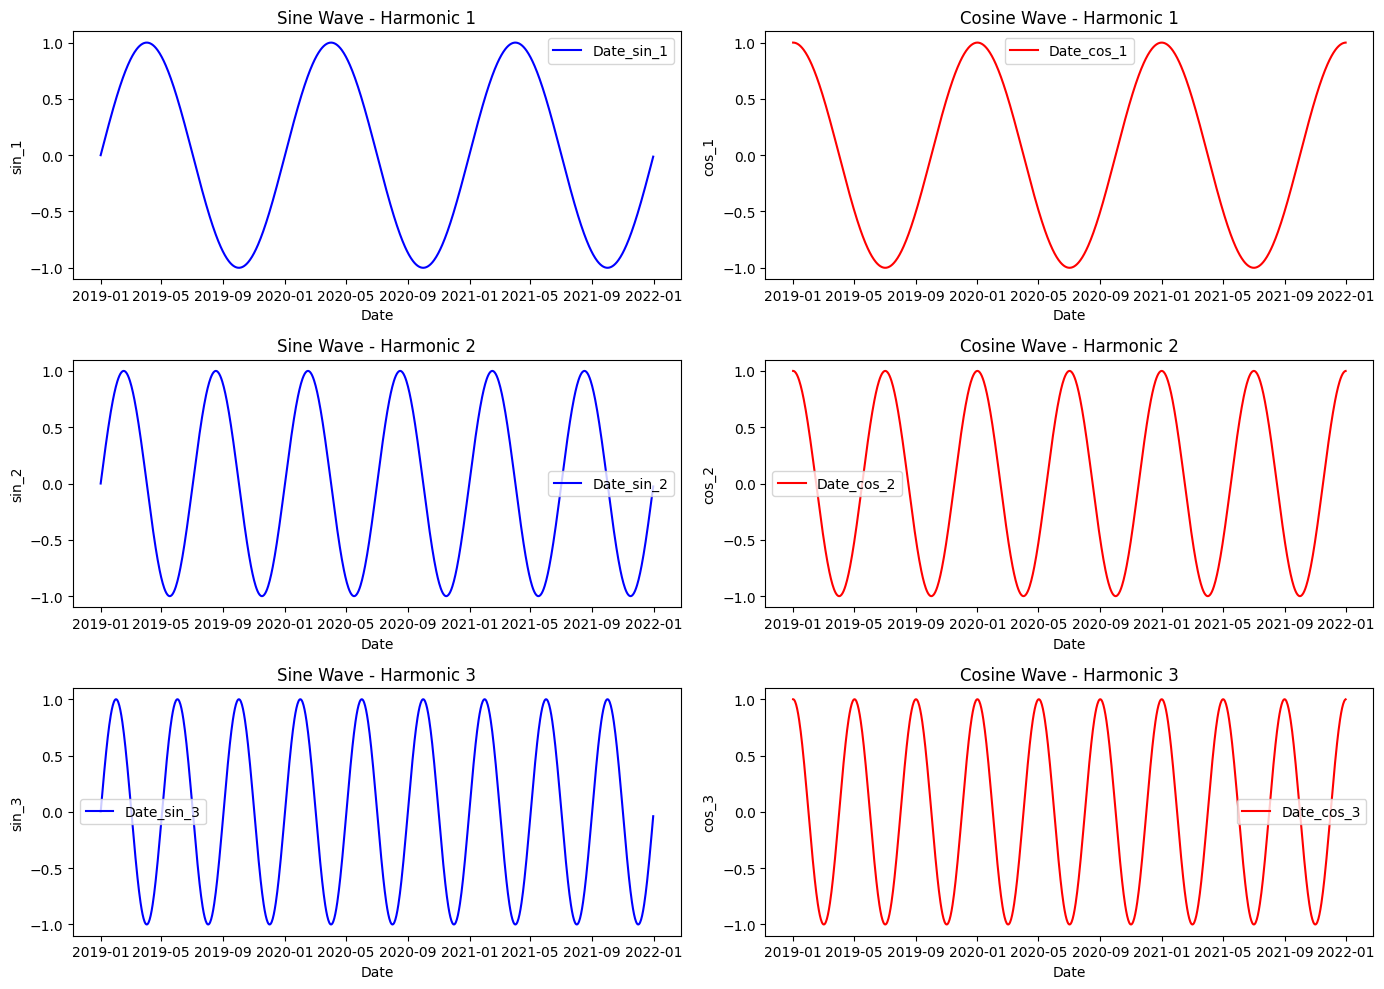

In [45]:
import pandas as pd
import numpy as np

def fourier_series(df, period, n_harmonics, columns):
    # Iterate over each column to compute Fourier terms
    for col in columns:
        # Make sure the column is datetime if it's a date column
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            # Calculate time in days since the start of the data for date columns
            t = (df[col] - df[col].min()).dt.days.values
        else:
            # For non-date columns, assume values are continuous time series
            t = df[col].values

        # Generate Fourier series terms for each harmonic
        for k in range(1, n_harmonics + 1):
            df[f'{col}_sin_{k}'] = np.sin(2 * np.pi * k * t / period)
            df[f'{col}_cos_{k}'] = np.cos(2 * np.pi * k * t / period)

    return df

period = 365.25  # Annual seasonality
n_harmonics = 3

ft_data = fourier_series(data, period=period, n_harmonics=n_harmonics, columns=['Date'])

plt.figure(figsize=(14, 10))

for k in range(1, n_harmonics + 1):
    plt.subplot(n_harmonics, 2, 2 * k - 1)
    plt.plot(ft_data['Date'], ft_data[f'Date_sin_{k}'], label=f'Date_sin_{k}', color='blue')
    plt.title(f'Sine Wave - Harmonic {k}')
    plt.xlabel('Date')
    plt.ylabel(f'sin_{k}')
    plt.legend()

    plt.subplot(n_harmonics, 2, 2 * k)
    plt.plot(ft_data['Date'], ft_data[f'Date_cos_{k}'], label=f'Date_cos_{k}', color='red')
    plt.title(f'Cosine Wave - Harmonic {k}')
    plt.xlabel('Date')
    plt.ylabel(f'cos_{k}')
    plt.legend()

plt.tight_layout()
plt.show()
